<a href="https://colab.research.google.com/github/berthine/SIAM-Summer-School/blob/main/SIAM2021_Linear_Reg_3_(short).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical: Introduction (3) to linear regression using Tensorflow (short approach)
(19/July/2021)

### 2021 Gene Golub SIAM Summer School 
https://sites.google.com/aims.ac.za/g2s3/home 

Instructor

<font color="green">***Dr. Emmanuel Dufourq*** 

www.emmanueldufourq.com

edufourq (['@']) gmail.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2021***


Material adapted from:

https://www.tensorflow.org/guide/basic_training_loops

## <font color="green"> Learning outcomes:

* Your first encounter of the ```Model.fit()``` function which simplies the training loop

## <font color="green">Data information:

* Features: two real valued features

* Output: one real valued label

## <font color="green">Tasks for participants (boolean)?


* No, follow along and make your own modifications and make sure you understand


In this notebook we'll create a dataset that has two features. We will create a linear model

In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## First we generate some data

In [ ]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

# True values
true_w = tf.constant([-2, -3.4])
true_b = -1.9

features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
features.shape

TensorShape([1000, 2])

In [ ]:
labels.shape

TensorShape([1000, 1])

## Plot the data

Plotting the first feature

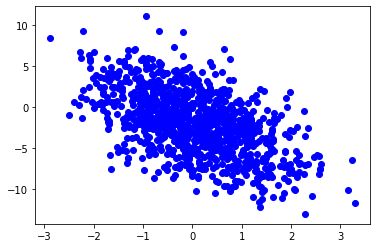

In [ ]:
plt.scatter(features[:,0].numpy(), labels.numpy(), c="b")
plt.show()

Plotting the second feature

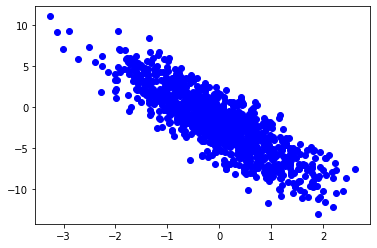

In [ ]:
plt.scatter(features[:,1].numpy(), labels.numpy(), c="b")
plt.show()

Recall that training models consists of making multiple passes over the dataset, grabbing one minibatch of examples at a time, and using them to update our model. 

Each minibatch consists of a tuple of features and labels.

The function below creates an iterator which can generate mini-batches of X-y pairs



In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    # The examples are read at random, in no particular order
    random.shuffle(indices)

    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i:min(i + batch_size, num_examples)])

        # Return a tuple of features and labels
        yield tf.gather(features, j), tf.gather(labels, j)

Let's take a look at a mini batch

In [ ]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print ('mini batch X')
    print(X)
    print ('\nmini batch Y')
    print (y)
    break

mini batch X
tf.Tensor(
[[-0.06169691  1.3336644 ]
 [-0.20368214  0.20611808]
 [ 0.2006544   0.711664  ]
 [-1.6556935   2.6122277 ]
 [-0.3316214   1.4712697 ]
 [-0.53962195  0.44333452]
 [ 0.9359236  -0.64163005]
 [-1.8678107   0.39284563]
 [-0.6673618   0.5022949 ]
 [ 1.6325883   1.7032566 ]], shape=(10, 2), dtype=float32)

mini batch Y
tf.Tensor(
[[ -6.321569 ]
 [ -2.2035964]
 [ -4.7326794]
 [ -7.470832 ]
 [ -6.2314224]
 [ -2.3340766]
 [ -1.5952168]
 [  0.5164884]
 [ -2.276303 ]
 [-10.943001 ]], shape=(10, 1), dtype=float32)


## Define the model using ```tf.keras.Model```

https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [ ]:
class MyThirdModel(tf.keras.Model):
  def __init__(self):
    super().__init__()

    # Weights
    self.w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01))
    # Bias
    self.b = tf.Variable(tf.zeros(1))

  def __call__(self, x, training=True):
    # Let's make use of what we learnt in the last notebook, i.e., tf.matmul()
    return tf.matmul(x, self.w) + self.b

In [ ]:
linear_reg = MyThirdModel()

## Display the variables

In [ ]:
linear_reg.variables

[<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.0033869],
        [-0.0067752]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

Plot the predictions before the optimisation process

Feature 0

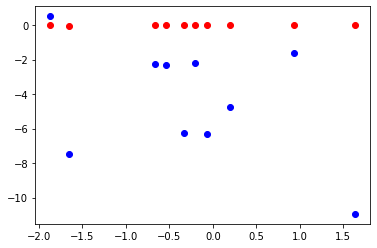

In [ ]:
plt.scatter(X[:,0], y, c="b")
plt.scatter(X[:,0], linear_reg(X).numpy(), c="r")
plt.show()

Feature 1

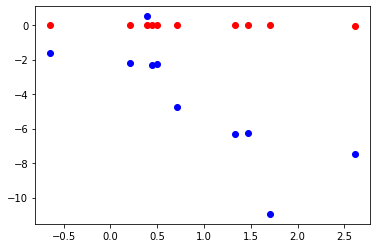

In [ ]:
plt.scatter(X[:,1], y, c="b")
plt.scatter(X[:,1], linear_reg(X).numpy(), c="r")
plt.show()

## Define the loss function

optimiser : https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

loss : https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [ ]:
linear_reg.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),

    # Keras comes with built-in MSE error
    loss=tf.keras.losses.mean_squared_error,
)

## Training

fit: https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

In [ ]:
linear_reg.fit(features.numpy(), labels.numpy(), epochs=10, batch_size=10)

Epoch 1/10
100/100 [==============================] - 0s 789us/step - loss: 0.5526
Epoch 2/10
100/100 [==============================] - 0s 756us/step - loss: 1.0754e-04
Epoch 3/10
100/100 [==============================] - 0s 752us/step - loss: 1.0769e-04
Epoch 4/10
100/100 [==============================] - 0s 829us/step - loss: 1.0781e-04
Epoch 5/10
100/100 [==============================] - 0s 846us/step - loss: 1.1012e-04
Epoch 6/10
100/100 [==============================] - 0s 847us/step - loss: 1.0865e-04
Epoch 7/10
100/100 [==============================] - 0s 867us/step - loss: 1.0752e-04
Epoch 8/10
100/100 [==============================] - 0s 883us/step - loss: 1.0728e-04
Epoch 9/10
100/100 [==============================] - 0s 984us/step - loss: 1.0875e-04
Epoch 10/10
100/100 [==============================] - 0s 771us/step - loss: 1.0791e-04


## Evaluate


In [ ]:
print(f'error in estimating w: {true_w - tf.reshape(linear_reg.w, true_w.shape)}')
print(f'error in estimating b: {true_b - linear_reg.b}')

error in estimating w: [-0.00183523  0.00091982]
error in estimating b: [-0.00079942]


Weights from the model

In [ ]:
linear_reg.w, linear_reg.b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[-1.9981648],
        [-3.40092  ]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.8992006], dtype=float32)>)

True values

In [ ]:
true_w, true_b

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-2. , -3.4], dtype=float32)>,
 -1.9)